# Train a YoloV8 on custom dataset

In [1]:
!nvidia-smi

Fri Oct 25 06:14:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.5/877.5 kB 24.4 MB/s eta 0:00:00


##  install YoloV8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import Image, display
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 765, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'predict', 'val', 'train', 'benchmark', 'track', 'export'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'detect', 'obb', 'segment', 'pose'}
                MODE (required) is one of {'predict', 'val', 'train', 'benchmark', 'track', 'export'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

## lets run a detection to validate model installation

In [4]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="https://pyxis.nymag.com/v1/imgs/d78/f87/d893cf519f2011746903767774ebac48d0-16-upper-west-side.rhorizontal.w700.jpg"

100% 6.25M/6.25M [00:00<00:00, 116MB/s]
Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 91.5k/91.5k [00:00<00:00, 6.90MB/s]
image 1/1 /content/d893cf519f2011746903767774ebac48d0-16-upper-west-side.rhorizontal.w700.jpg: 448x640 15 persons, 2 bicycles, 1 bench, 4 umbrellas, 1 potted plant, 37.2ms
Speed: 10.0ms preprocess, 37.2ms inference, 794.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


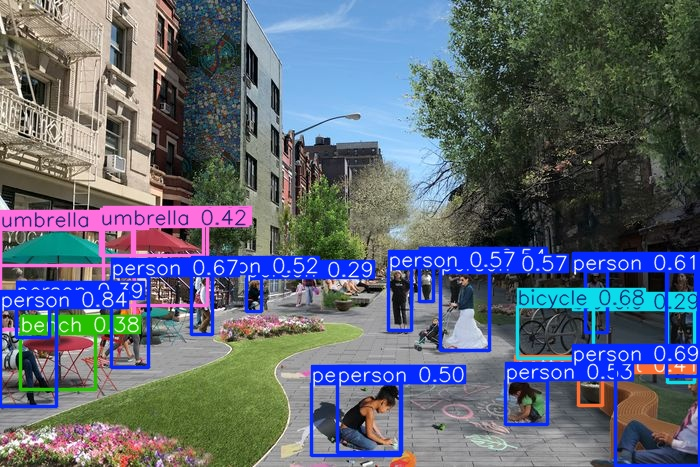

In [5]:
Image(filename="runs/detect/predict/d893cf519f2011746903767774ebac48d0-16-upper-west-side.rhorizontal.w700.jpg", height=600)

## Train our custom model

In [6]:
#!pip install roboflow --quite
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="#####")
project = rf.workspace("fruit-detection-et4tw").project("fruit-detecion")
version = project.version(13)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fruit-detecion-13 in yolov8:: 100%|██████████| 18094/18094 [00:04<00:00, 4316.72it/s]


In [7]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 279MB/s]
Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/fruit-detecion-13/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

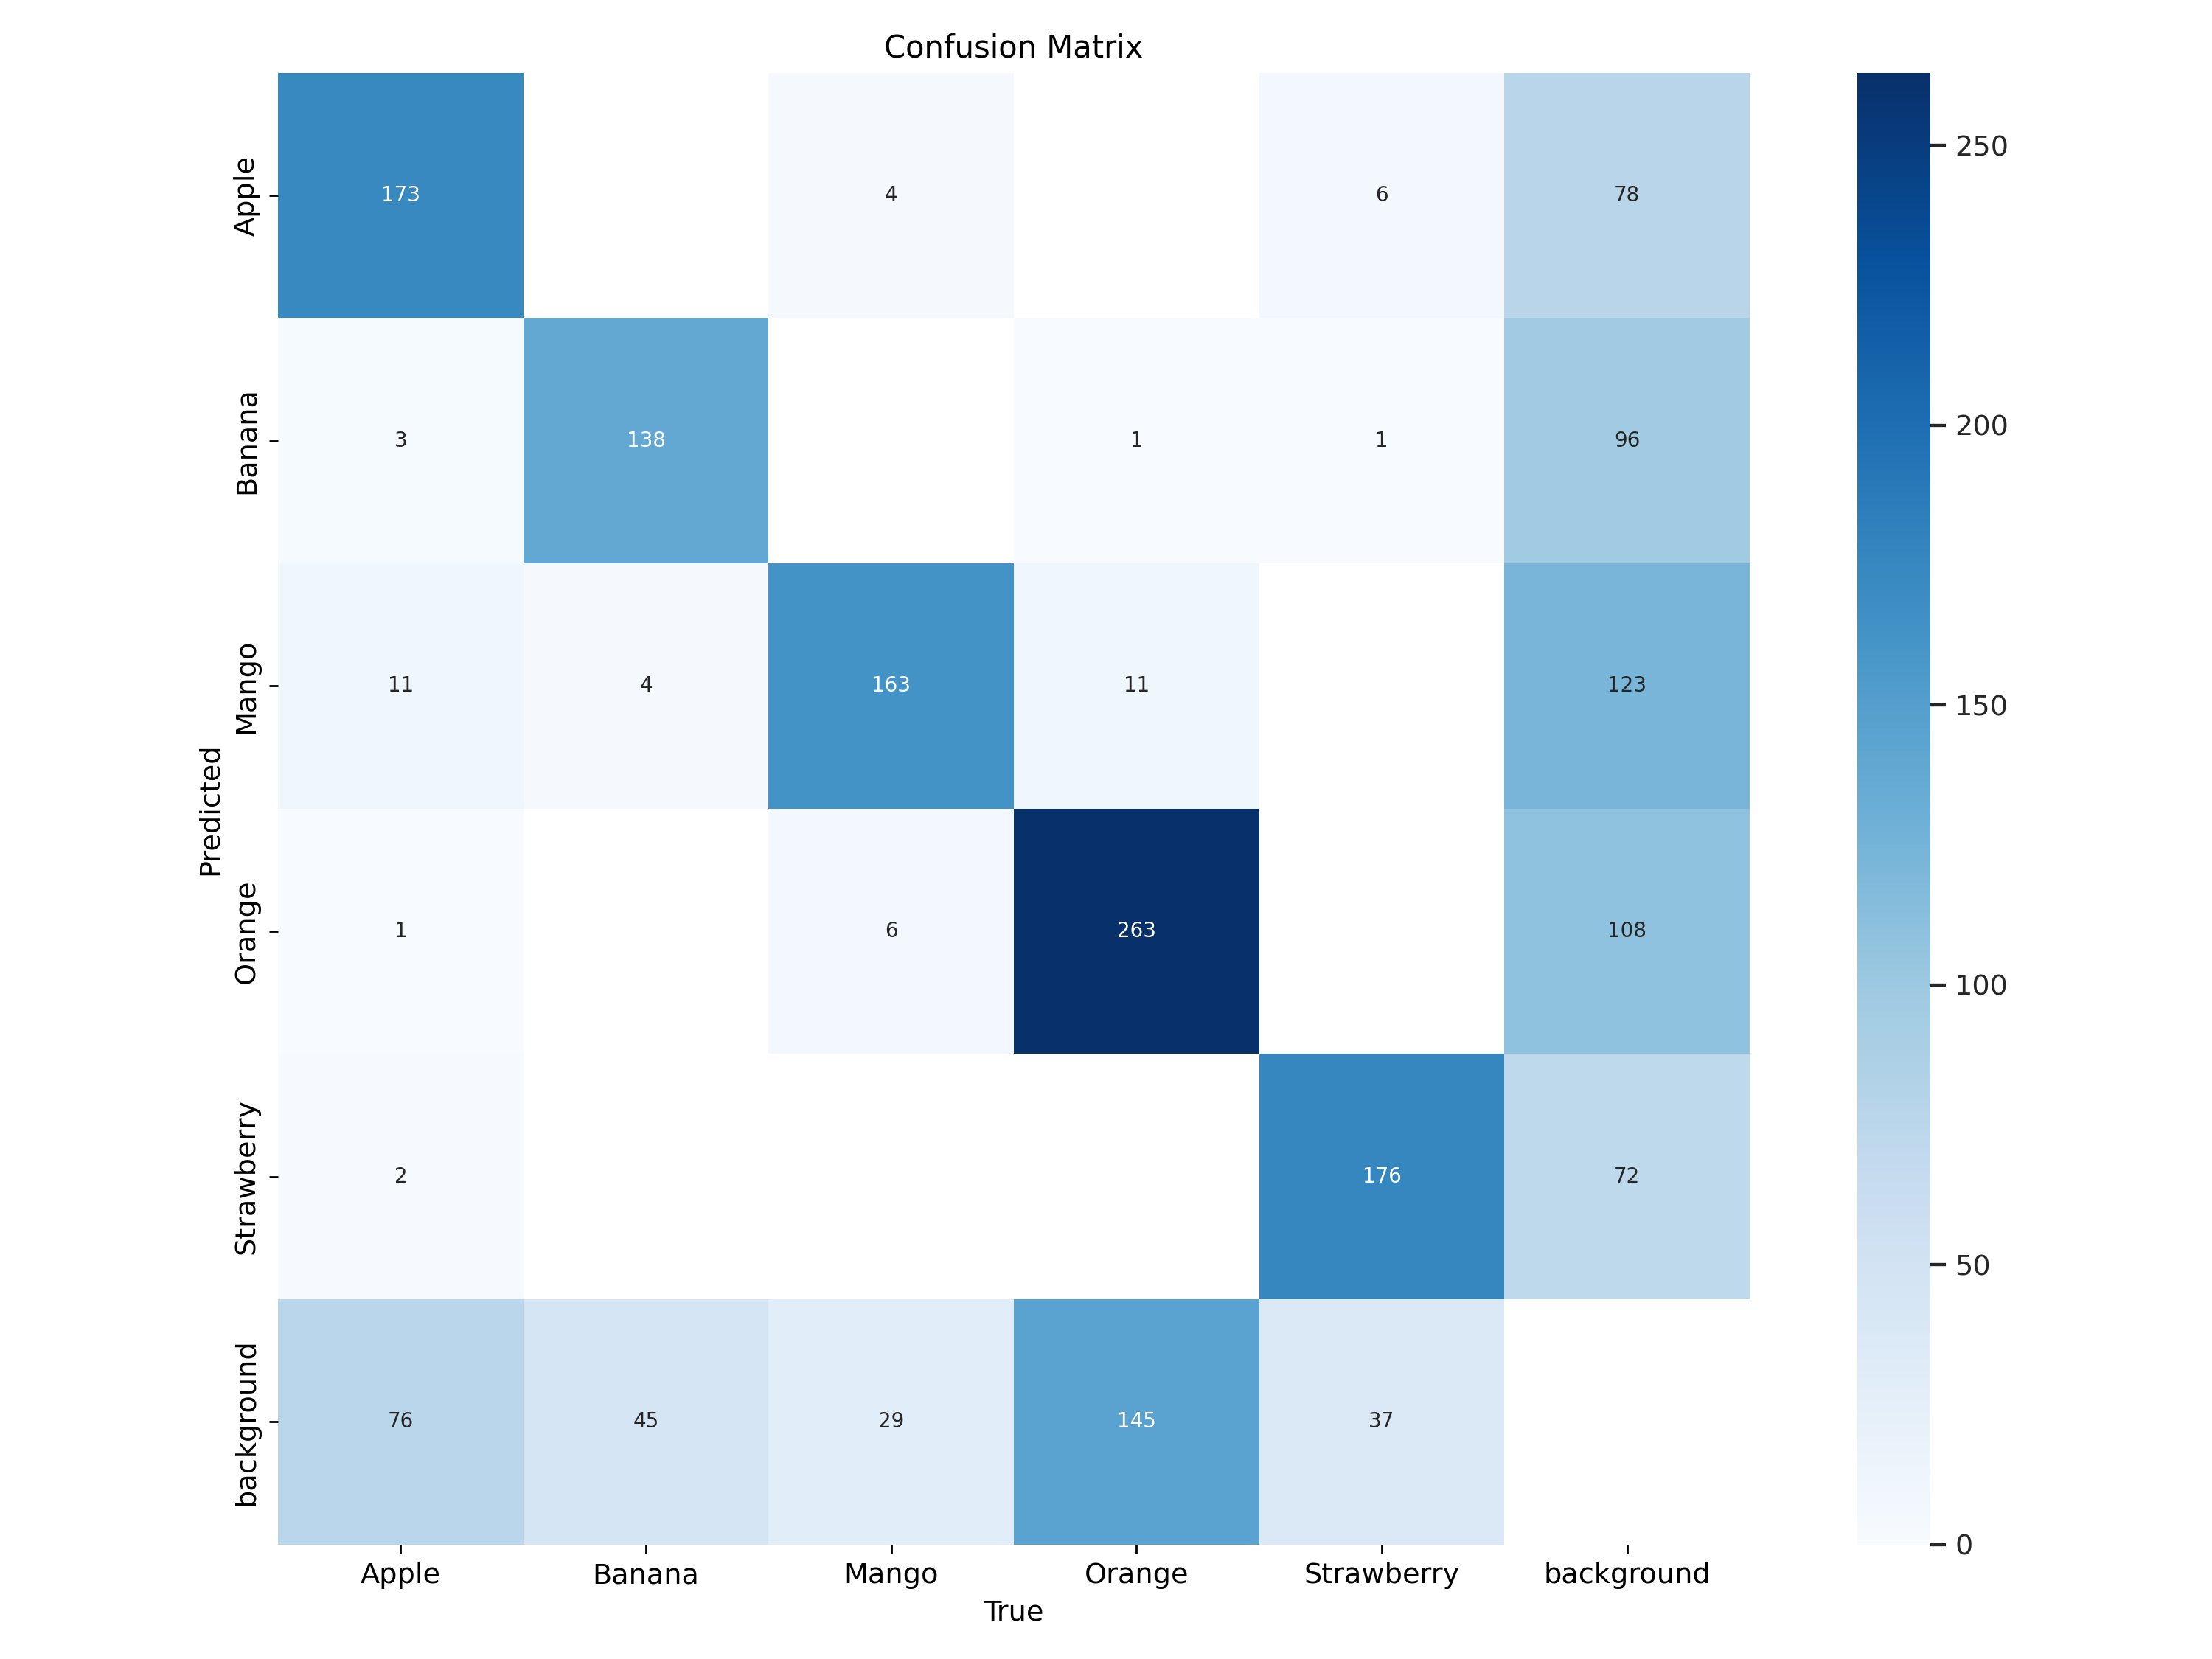

In [8]:
Image(filename=f"/content/runs/detect/train/confusion_matrix.png", width=600)

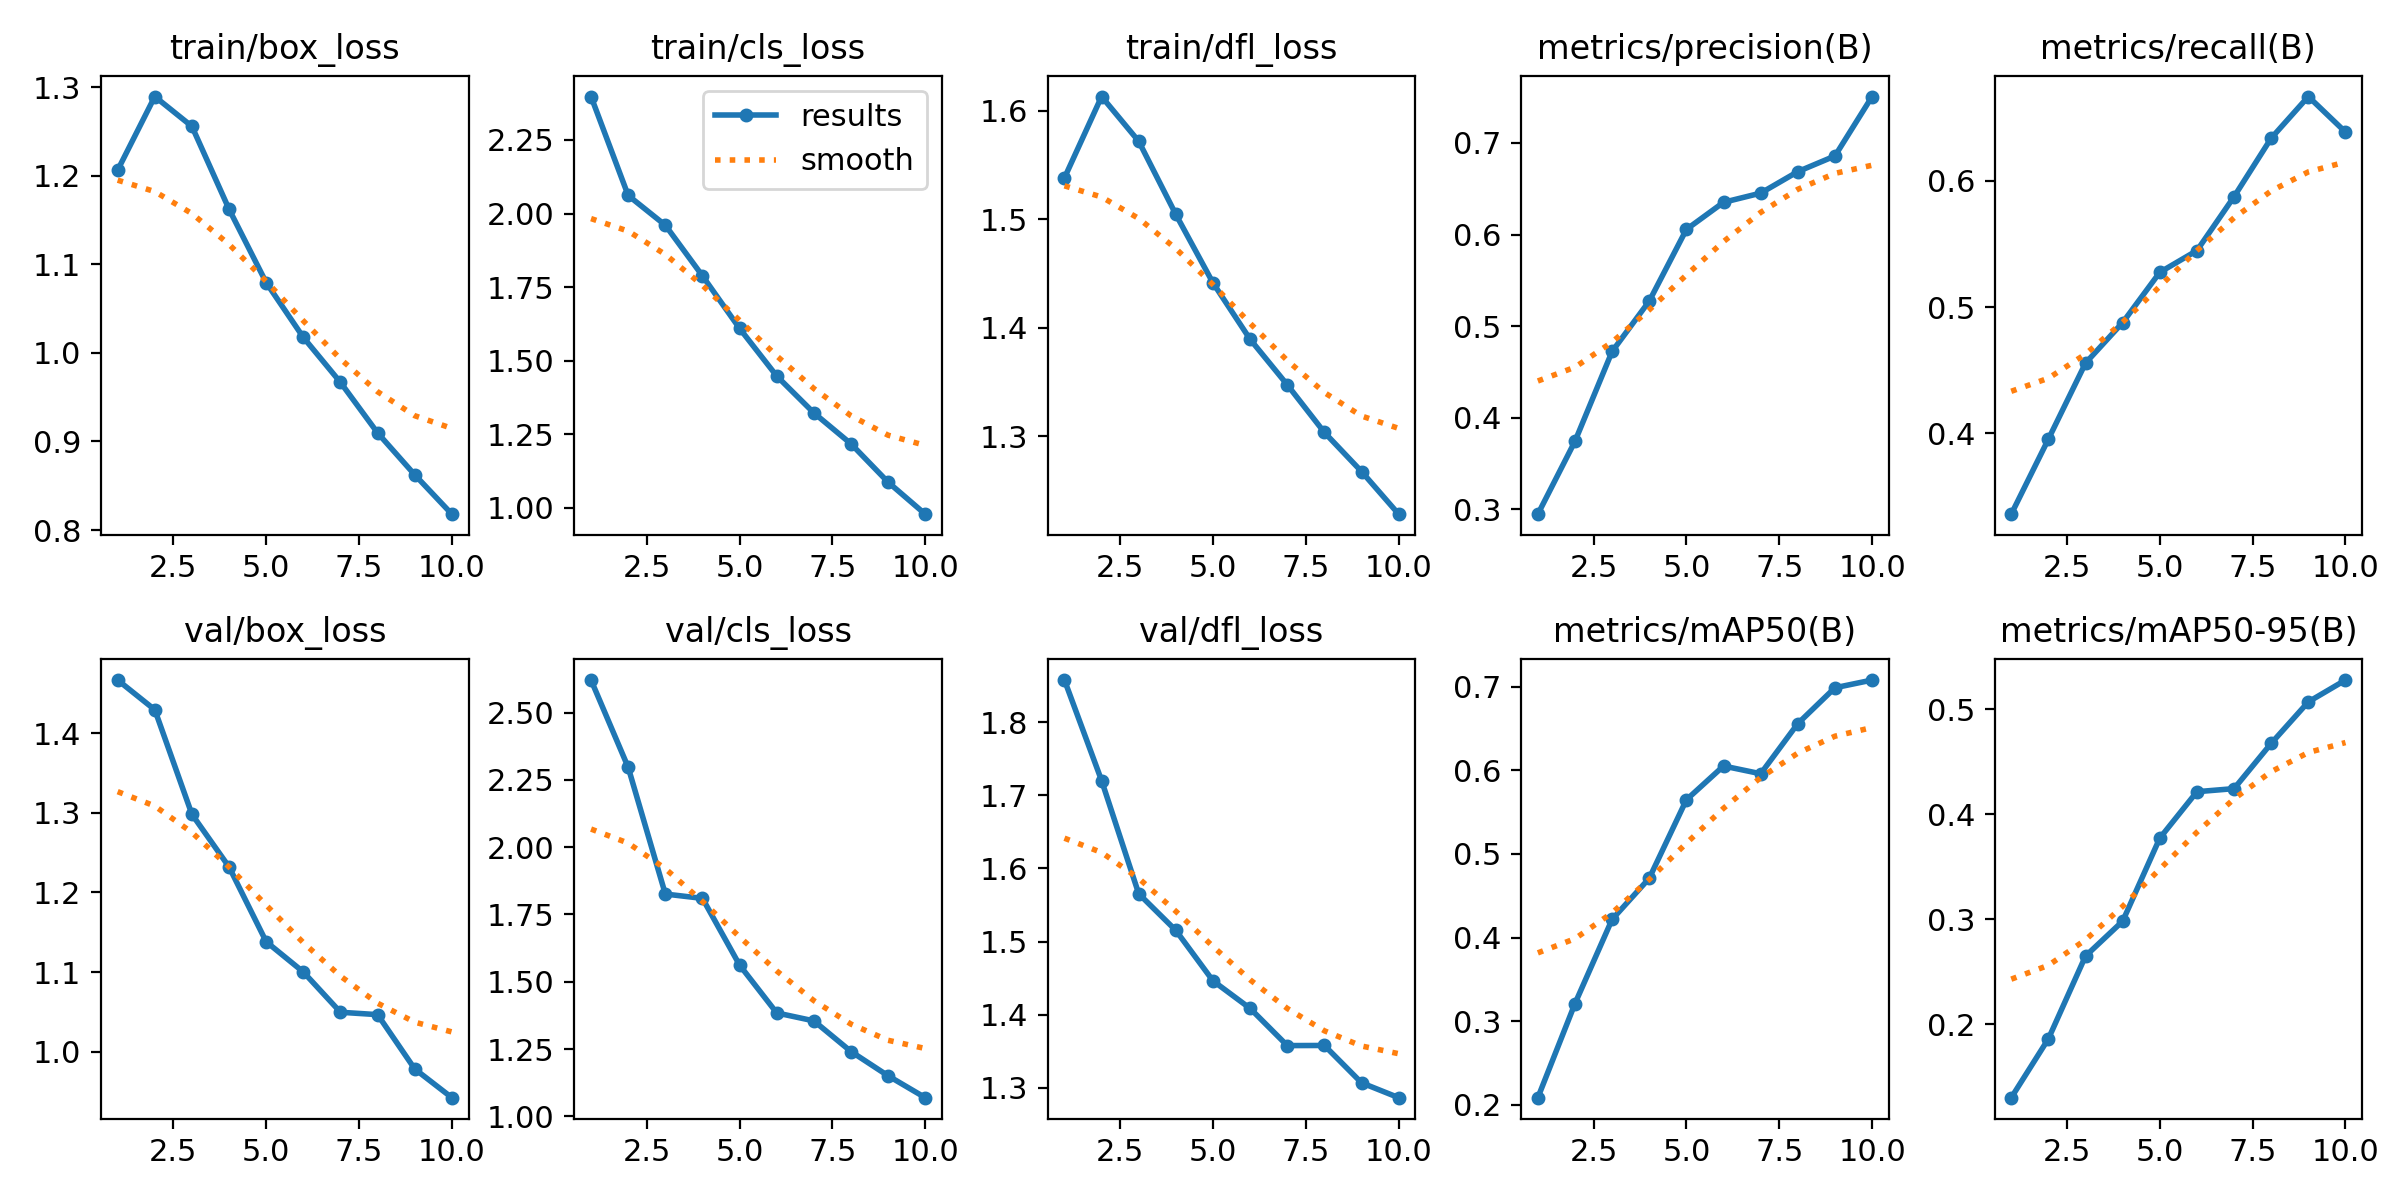

In [9]:
Image(filename=f"/content/runs/detect/train/results.png", width=600)

## run a validation on the model

In [11]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/fruit-detecion-13/valid/labels.cache... 470 images, 0 backgrounds, 0 corrupt: 100% 470/470 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 30/30 [00:13<00:00,  2.29it/s]
                   all        470       1295      0.751      0.638      0.709      0.528
                 Apple         88        266      0.772      0.549      0.681      0.565
                Banana        126        187      0.733      0.658      0.703      0.503
                 Mango         96        202      0.665      0.723      0.678      0.489
                Orange         97        420      0.773      0.524      0.645      0.451
            Strawberry         79        220      0.811      0.739      0.837       0.63
Speed: 0.6ms preprocess, 20.4ms inference, 0

## run a detection on the custom model on the test images

In [13]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs

image 1/284 /content/fruit-detecion-13/test/images/003f09b07cc748e4_jpg.rf.c7297fe457af7ea8cdc5de3962bbbfad.jpg: 640x640 3 Bananas, 38.1ms
image 2/284 /content/fruit-detecion-13/test/images/092d59a67c16195a_jpg.rf.c95598ed01f59bcc9fb3f60eea772bf4.jpg: 640x640 2 Bananas, 1 Orange, 37.0ms
image 3/284 /content/fruit-detecion-13/test/images/0a2bfef3b22f77b6_jpg.rf.333683a1627ffc2a2cdc3b57450865ad.jpg: 640x640 16 Apples, 10 Oranges, 37.0ms
image 4/284 /content/fruit-detecion-13/test/images/0a4827f20c8aef05_jpg.rf.8053a56d53b0afb21ec0ccb6b83df087.jpg: 640x640 1 Mango, 5 Oranges, 35.4ms
image 5/284 /content/fruit-detecion-13/test/images/0b3691c7f10c1d08_jpg.rf.52ae717b84b4e583cfcc9bf9774340da.jpg: 640x640 1 Apple, 1 Banana, 34.6ms
image 6/284 /content/fruit-detecion-13/test/images/0b39979279b3b8aa_jpg.rf.e5799628ae51f2e85ceb7d2b5

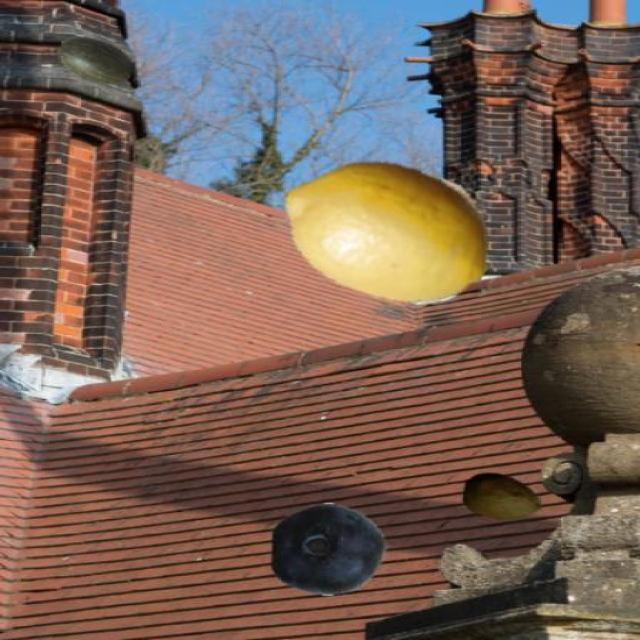

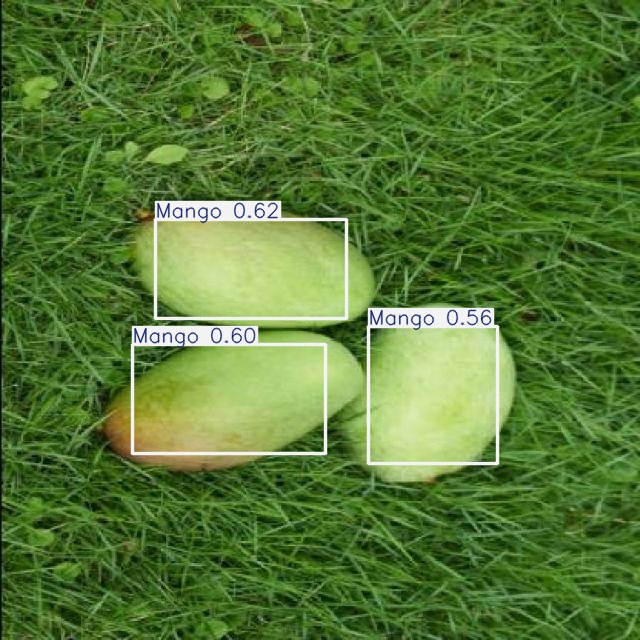

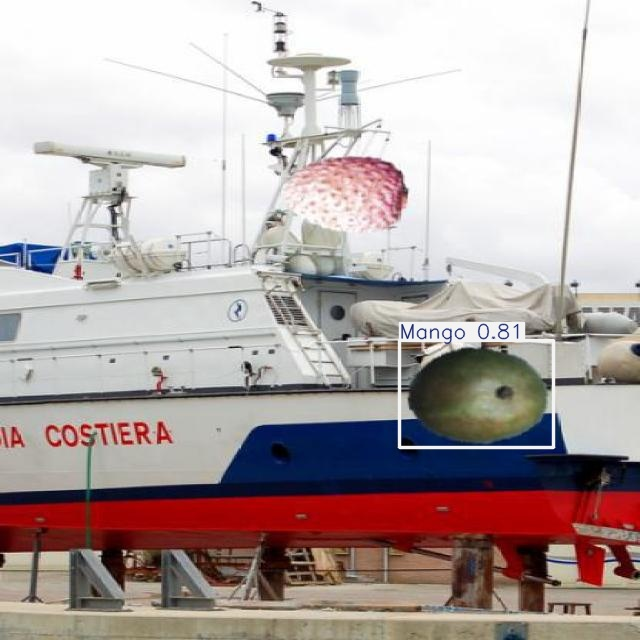

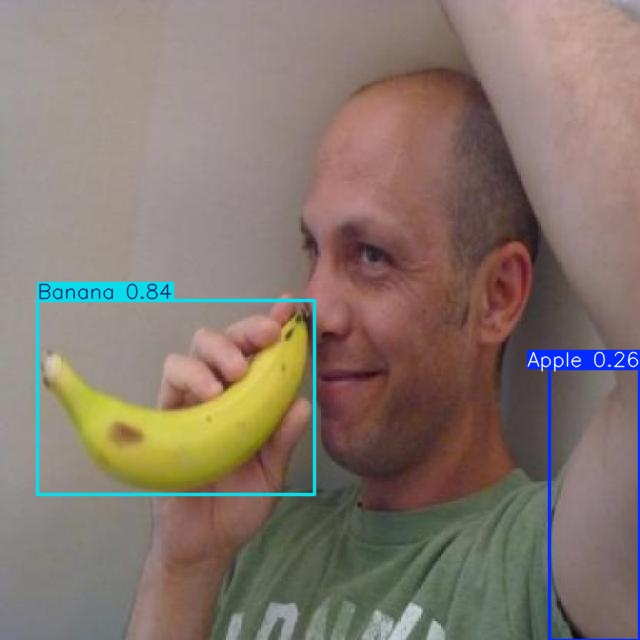

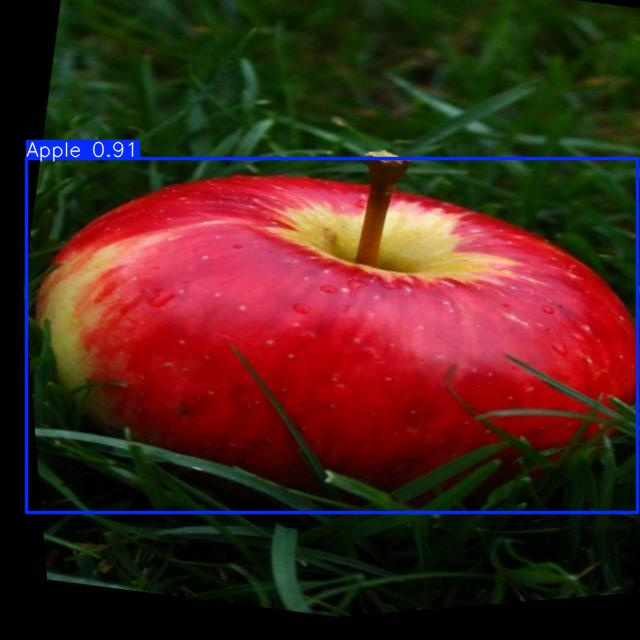

In [19]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f"/content/runs/detect/predict2/*.jpg")[:5]:
  display(Image(filename=image_path, height=600))
  print("\n")